# Prep

https://mapapps.bgs.ac.uk/geologyofbritain/home.html

In [1]:
import pooch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
import harmonica as hm
import boule as bl

In [2]:
data = hm.datasets.fetch_south_africa_gravity()
data = data[data.elevation > 0]
data

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,latitude,longitude,elevation,gravity
43,-34.12971,18.34444,32.2,979656.12
44,-34.08833,18.36028,592.5,979508.21
45,-34.19583,18.37418,18.4,979666.46
47,-34.23972,18.40388,25.0,979671.03
48,-34.16444,18.41112,228.7,979616.11
...,...,...,...,...
14554,-17.95833,21.22500,1053.1,978182.09
14555,-17.98333,21.27500,1033.3,978183.09
14556,-17.99166,21.70833,1041.8,978182.69
14557,-17.95833,21.85000,1033.3,978193.18


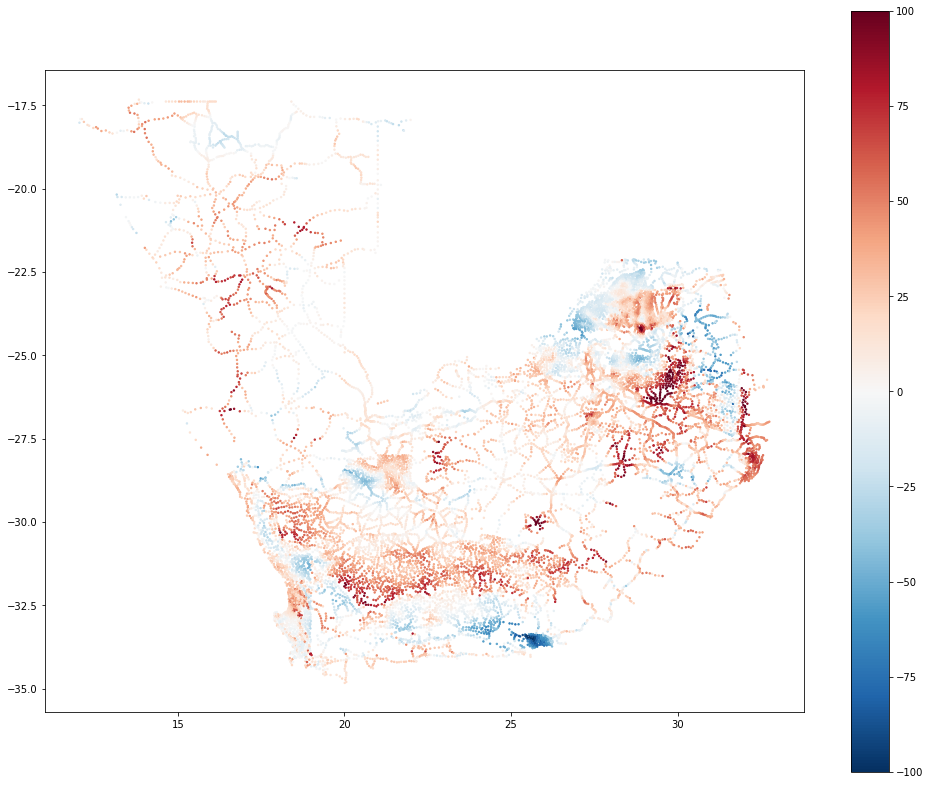

In [5]:
plt.figure(figsize=(17, 14))
plt.scatter(data.longitude, data.latitude, c=data.gravity - bl.WGS84.normal_gravity(data.latitude, data.elevation), s=2, vmin=-100, vmax=100, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

In [10]:
data["bouguer"] = data.gravity - bl.WGS84.normal_gravity(data.latitude, data.elevation) - hm.bouguer_correction(data.elevation)

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


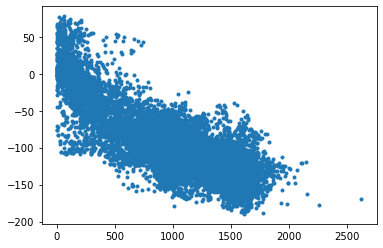

In [12]:
plt.plot(data.elevation, data.bouguer, ".")

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


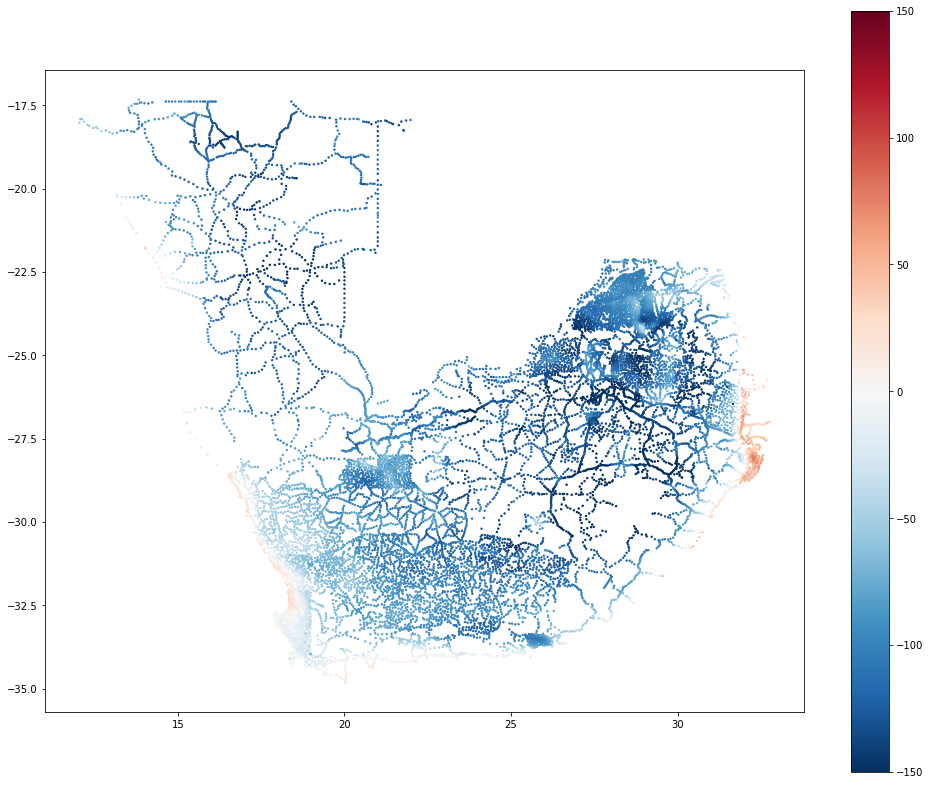

In [17]:
plt.figure(figsize=(17, 14))
plt.scatter(data.longitude, data.latitude, 
            c=data.bouguer, 
            s=2, vmin=-150, vmax=150, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

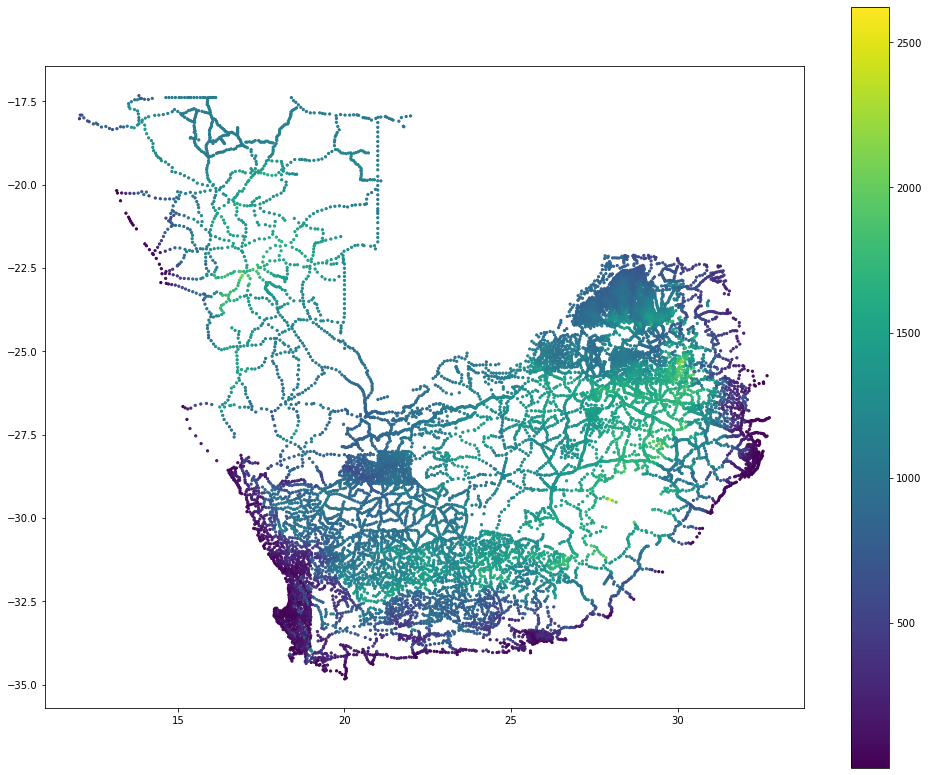

In [6]:
plt.figure(figsize=(17, 14))
plt.scatter(data.longitude, data.latitude, c=data.elevation, s=5)
plt.axis("scaled")
plt.colorbar()

In [71]:
region = [18, 19.2, -35, -33.3]
survey = data.loc[vd.inside((data.longitude, data.latitude), region) & (data.elevation < 300)].copy()
survey.shape

(160, 5)

In [72]:
trend = vd.Trend(degree=2).fit((survey.longitude, survey.latitude), survey.bouguer)
survey["residual"] = survey.bouguer - trend.predict((survey.longitude, survey.latitude))

/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/leo/miniconda3/envs/gravity/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


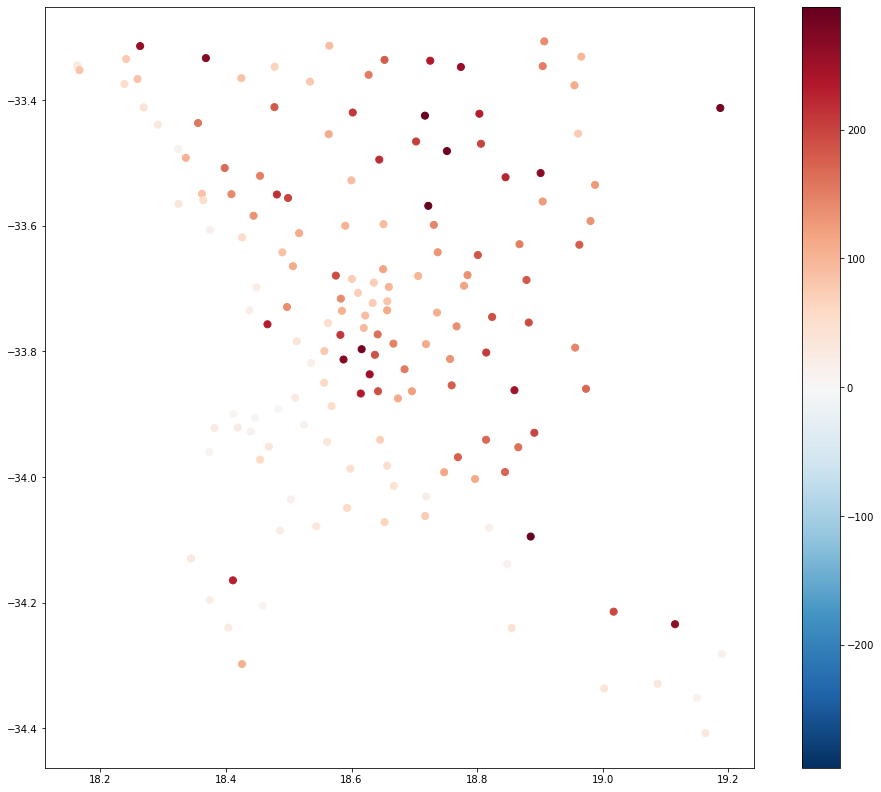

In [73]:
scale = np.percentile(np.abs(survey.elevation), 99)
plt.figure(figsize=(17, 14))
plt.scatter(survey.longitude, survey.latitude, c=survey.elevation, s=50, vmin=-scale, vmax=scale, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

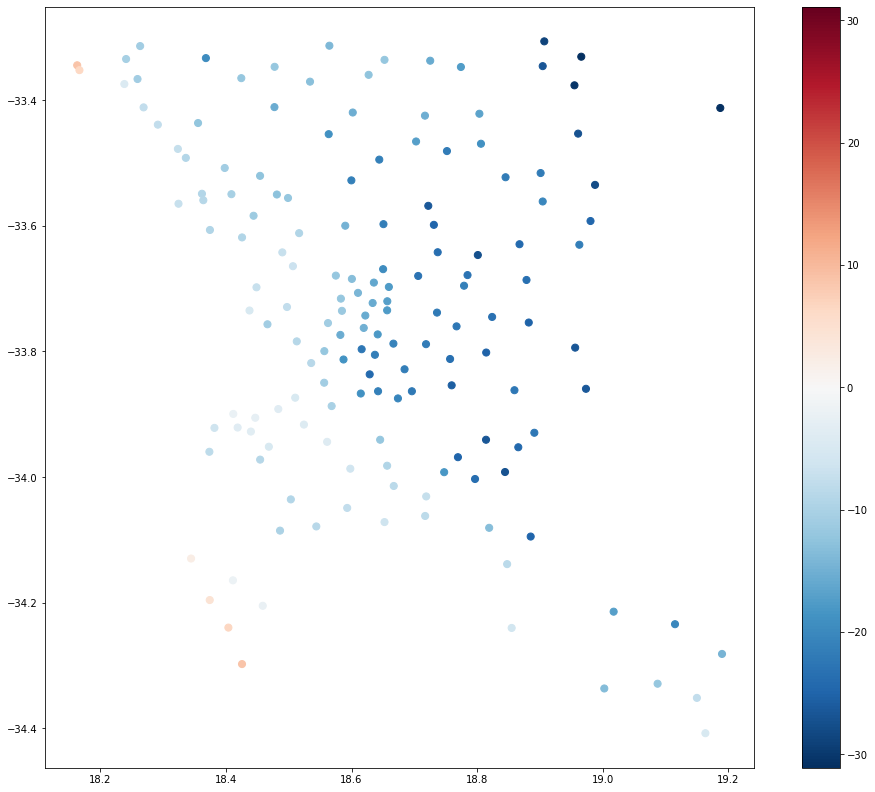

In [74]:
scale = np.percentile(np.abs(survey.bouguer), 99)
plt.figure(figsize=(17, 14))
plt.scatter(survey.longitude, survey.latitude, c=survey.bouguer, s=50, vmin=-scale, vmax=scale, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

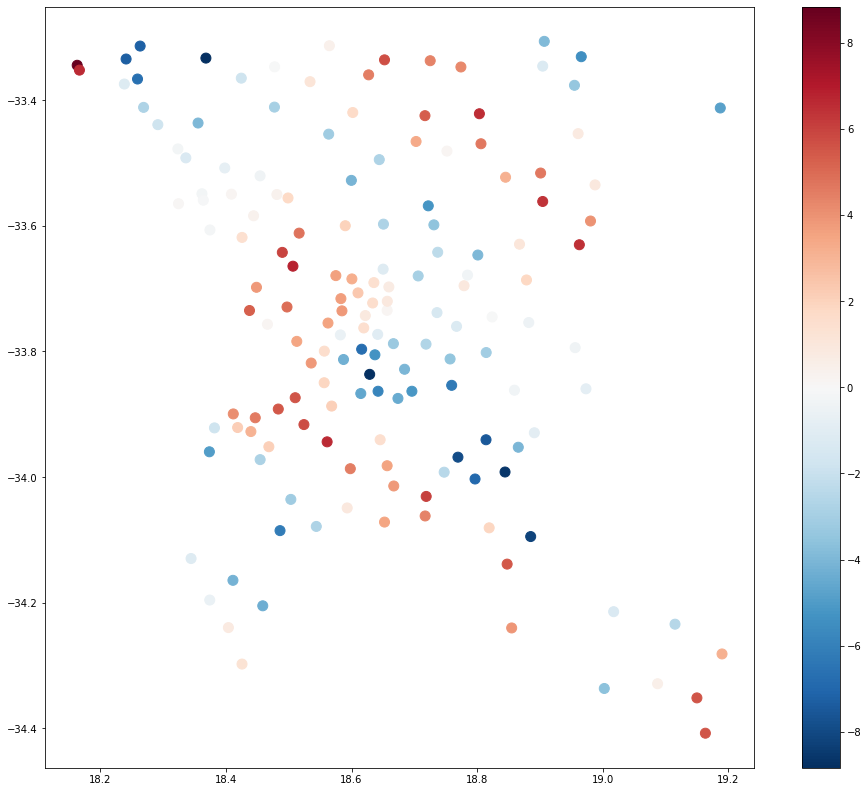

In [75]:
scale = np.percentile(np.abs(survey.residual), 99)
plt.figure(figsize=(17, 14))
plt.scatter(survey.longitude, survey.latitude, c=survey.residual, s=100, vmin=-scale, vmax=scale, cmap="RdBu_r")
plt.axis("scaled")
plt.colorbar()

Likely te cape town granite suite. https://en.wikipedia.org/wiki/Geology_of_Cape_Town